# 🏋 ex6 Python Pandas

Uses [matplotlib](https://matplotlib.org/) to create basic plots for [Pandas](https://pandas.pydata.org/) dataframe. Unless you want to customize plots there is no need to load `matplotlib`. 

Install pandas with:
```python
!pip install pandas
```

Importing `pandas` and `matplotlib` to get started:

In [63]:
#!pip3 install seaborn

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

Let's use iris:

In [9]:
df = pd.read_csv("data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Scatterplot

See `?pd.DataFrame.plot.scatter`

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

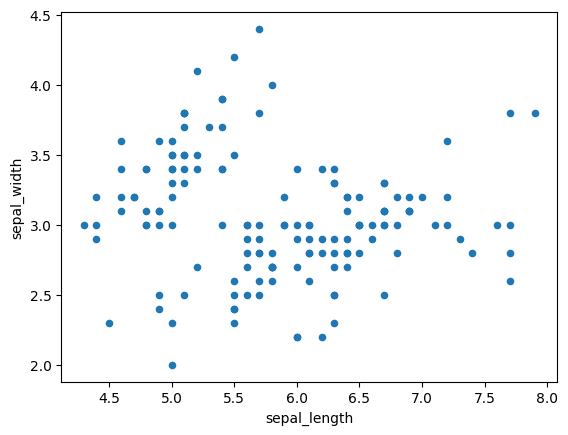

In [10]:
df.plot.scatter(x='sepal_length', y='sepal_width')

# Bar chart

See `?pd.DataFrame.plot.bar`

Let's create a minimal bar chart of sample type counts

<AxesSubplot: xlabel='species'>

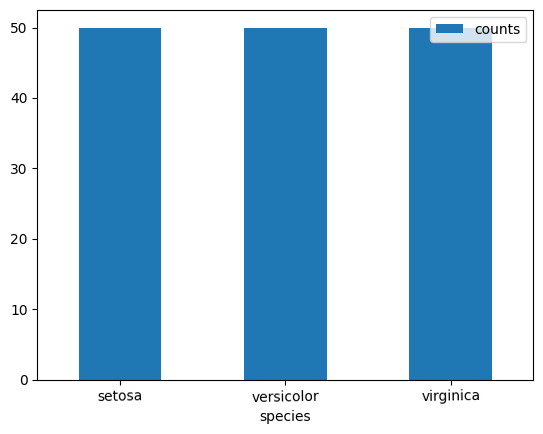

In [11]:
count_species = df.groupby(['species']).size().reset_index(name='counts')  #add column of counts

count_species.plot.bar(x = 'species', y = 'counts', rot = 1)  #rot = 1 sets labels horizontal

# Boxplot

See `?pd.DataFrame.boxplot`

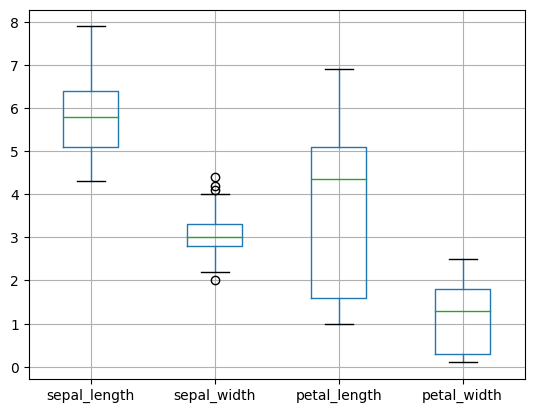

In [12]:
boxplot = df.boxplot()

# Histogram

See `?pd.DataFrame.hist`

array([[<AxesSubplot: title={'center': 'sepal_length'}>]], dtype=object)

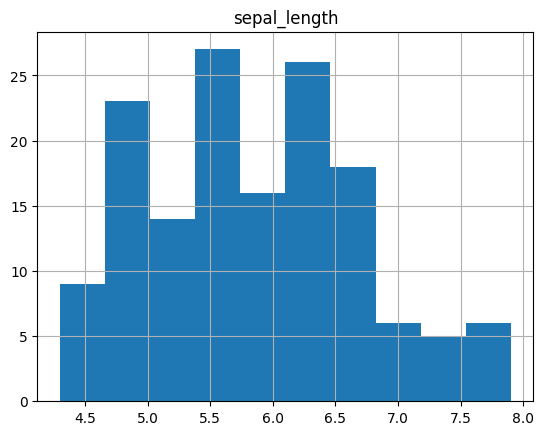

In [13]:
df.hist(column='sepal_length')

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

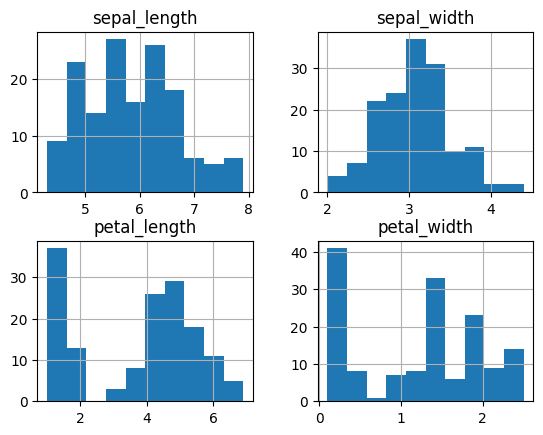

In [14]:
df.hist()

# Line chart

See `?pd.DataFrame.line`

<AxesSubplot: xlabel='x'>

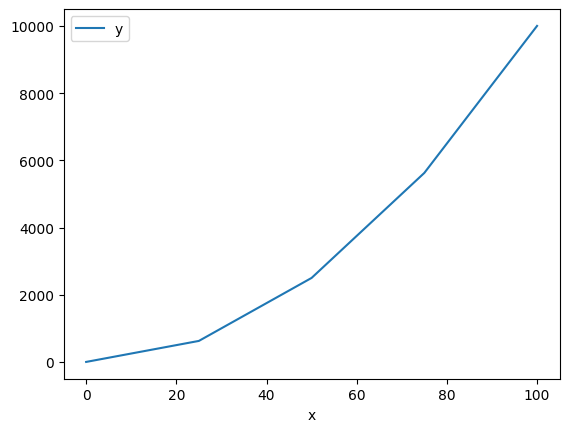

In [15]:
import numpy as np  #import numpy

x = np.linspace(0, 100, 5)
y = x * x

df = pd.DataFrame({
    'x' : x,
    'y' : y
    })

df.plot.line(x = 'x', y = 'y')

# Customizations
- Axis labels
- Title
- Graph size
- Transparency
- color
- color map

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


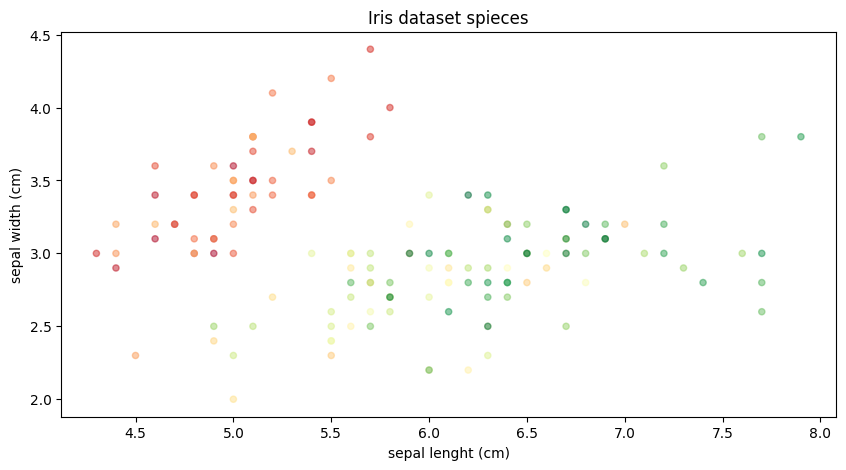

In [19]:
import matplotlib.cm as cm
import seaborn as sns

df = pd.read_csv("data/iris.csv")

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)  # Graph size

# Manually creating a color map
color_map = {'setosa': '#1b9e77', 'versicolor': '#d95f02', 'virginica': '#7570b3'} # color map
colors = df.species.map(color_map)

# Generating color map using Matplotlib
import numpy as np
colors = cm.RdYlGn(np.linspace(0, 1, len(df)))

#df.species.unique(): 'setosa', 'versicolor', 'virginica' unique species
df.plot.scatter(x='sepal_length', y='sepal_width', c=colors, alpha=0.5) # color and transparency
plt.xlabel('sepal lenght (cm)') # x label
plt.ylabel('sepal width (cm)') # y label
plt.title('Iris dataset spieces') # Title
plt.show()


---

# Exercises

## 😜 Exercise 1

Create a scatterplot of the `SMO-VOR-2015.csv` dataset:

 - load `SMO-VOR-2015.csv` in a dataframe
 - map `x` to `ptime`
 - map `y` to `alt`
 - set point `alpha` to `0.1`
 - set x axis label to 'Penetration time'
 - set y axis label to 'Altitude (feets)'
 - set title label to 'SMO VOR 2015 dataset'
 - resize the figure to `(10, 5)`
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


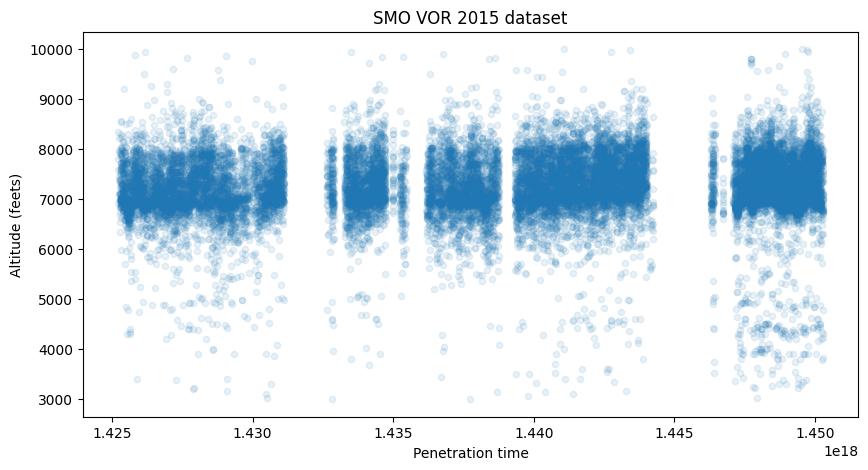

In [22]:
df = pd.read_csv('data/SMO-VOR-2015.csv')

df.ptime = pd.to_datetime(df.ptime).values.astype(float)
plt.rcParams["figure.figsize"] = (10,5) 
df.plot.scatter(x='ptime', y='alt',
                alpha = 0.1, 
                xlabel = 'Penetration time', ylabel = 'Altitude (feets)',
                title= 'SMO VOR 2015 dataset')

plt.show()

## 😜 Exercise 2

Create a bar chart of the `SMO-VOR-2015.csv` dataset:

 - load `SMO-VOR-2015.csv` in a dataframe
 - map `x` to `month`
 - map `y` to `counts` 
 - set y axis label to 'Count'
 - set title label to 'SMO VOR 2015 dataset'
 - set rot to 1

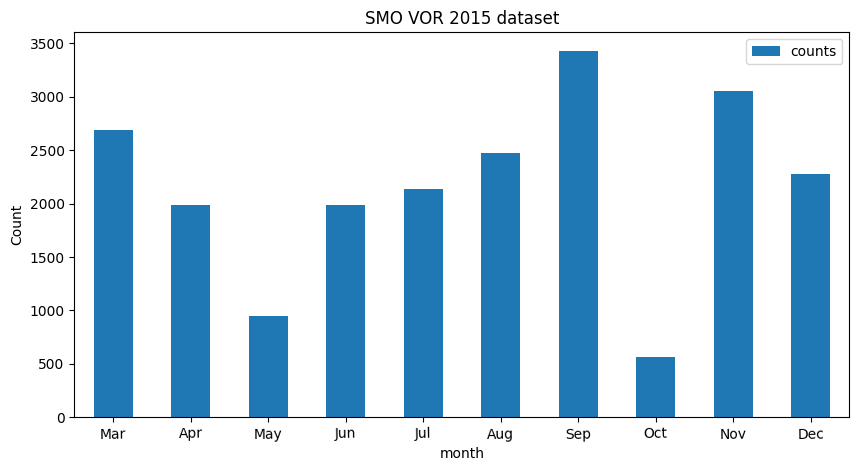

In [32]:
df = pd.read_csv('data/SMO-VOR-2015.csv')

months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.month = pd.Categorical(df.month, categories=months, ordered=True)
df = df.groupby(['month']).size().reset_index(name='counts')
#plt.figure(figsize=(5,5))
plt.rcParams["figure.figsize"] = (10,5) 
df.plot.bar(x = 'month', y = 'counts', rot = 1, )  #rot = 1 sets labels horizontal
plt.ylabel('Count')
plt.title('SMO VOR 2015 dataset')
plt.show()

## 😜 Exercise 3

Create a boxplot of the `SMO-VOR-2015.csv` by months:

 - load `SMO-VOR-2015.csv` in a dataframe
 - set y axis label to 'Altitude (feets)'
 - set title label to 'SMO VOR 2015 dataset'

Text(0.5, 1.0, 'SMO VOR 2015 dataset')

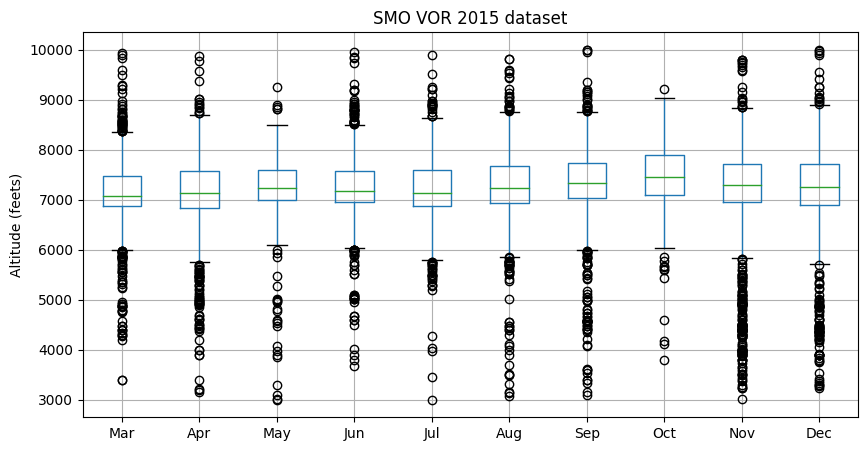

In [37]:
df = pd.read_csv('data/SMO-VOR-2015.csv')

months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.month = pd.Categorical(df.month, categories=months, ordered=True)

df = pd.DataFrame({
    'Mar' : pd.Series(df.alt[df.month == 'Mar']),
    'Apr' : pd.Series(df.alt[df.month == 'Apr']),
    'May' : pd.Series(df.alt[df.month == 'May']),
    'Jun' : pd.Series(df.alt[df.month == 'Jun']),
    'Jul' : pd.Series(df.alt[df.month == 'Jul']),
    'Aug' : pd.Series(df.alt[df.month == 'Aug']),
    'Sep' : pd.Series(df.alt[df.month == 'Sep']),
    'Oct' : pd.Series(df.alt[df.month == 'Oct']),
    'Nov' : pd.Series(df.alt[df.month == 'Nov']),
    'Dec' : pd.Series(df.alt[df.month == 'Dec'])
    })

boxplot = df.boxplot()
plt.ylabel('Altitude (feets)')
plt.title('SMO VOR 2015 dataset')


## 😜 Exercise 4

Create an histogram chart of `SMO-VOR-2015.csv` by month:

 - load `SMO-VOR-2015.csv` in a dataframe
 - set y axis label to 'Altitude (feets)'
 - set title label to 'SMO VOR 2015 dataset'

Text(0.5, 1.0, 'SMO VOR 2015 dataset')

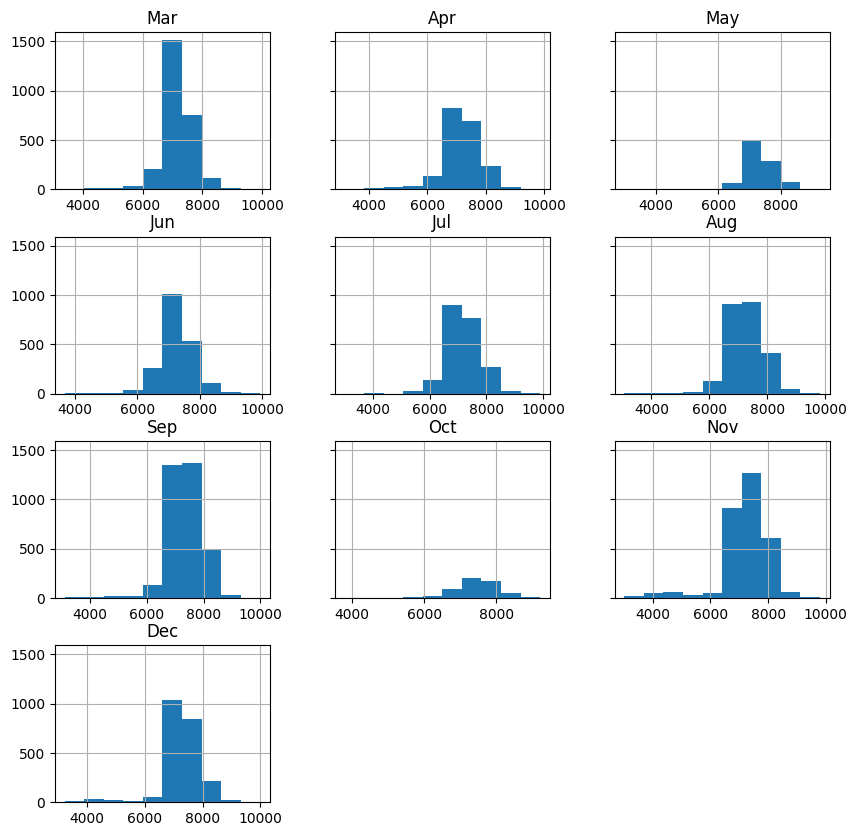

In [56]:
df = pd.read_csv('data/SMO-VOR-2015.csv')

months = ['Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.month = pd.Categorical(df.month, categories=months, ordered=True)

df = pd.DataFrame({
    'Mar' : pd.Series(df.alt[df.month == 'Mar']),
    'Apr' : pd.Series(df.alt[df.month == 'Apr']),
    'May' : pd.Series(df.alt[df.month == 'May']),
    'Jun' : pd.Series(df.alt[df.month == 'Jun']),
    'Jul' : pd.Series(df.alt[df.month == 'Jul']),
    'Aug' : pd.Series(df.alt[df.month == 'Aug']),
    'Sep' : pd.Series(df.alt[df.month == 'Sep']),
    'Oct' : pd.Series(df.alt[df.month == 'Oct']),
    'Nov' : pd.Series(df.alt[df.month == 'Nov']),
    'Dec' : pd.Series(df.alt[df.month == 'Dec'])
    })
df
#plt.rcParams["figure.figsize"] = (10,10) 
df.hist(figsize = (10,10), sharey= True)
plt.ylabel('Altitude (feets)')
plt.title('SMO VOR 2015 dataset')


## 😜 Exercise 5

Create a line chart of the `TSLA.csv` dataset:

 - load `TSLA.csv` in a dataframe
 - map `x` to `Date`
 - map `y` to `Close`
 - set `marker` to '.'
 - set `color` to 'r'
 - set `linestyle` ':' 
 - set x axis label to ''
 - set y axis label to 'Stock closure value ($)'
 - set title label to 'Tesla (TSLA) Jan-Jul 2019'

Text(0.5, 0, '')

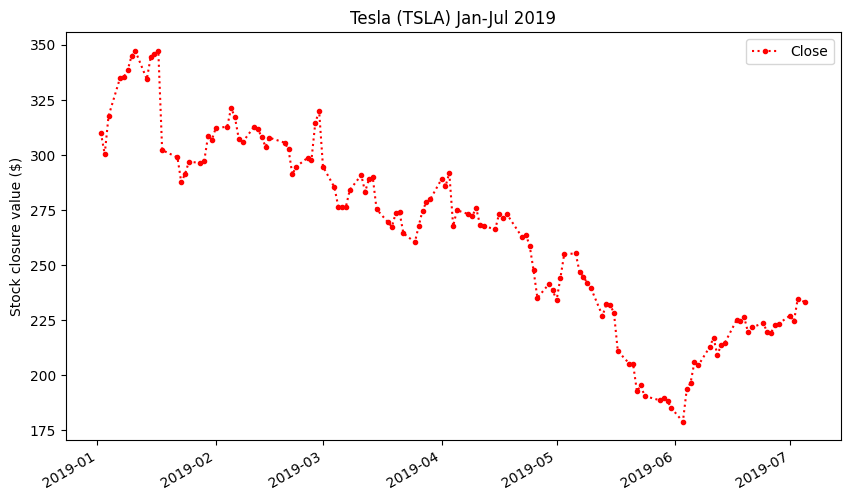

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/TSLA.csv')
df.Date = pd.to_datetime(df.Date)

df.plot.line(x = 'Date', y = 'Close', marker = '.', color = 'r', linestyle = ':', figsize=(10,6))
plt.title('Tesla (TSLA) Jan-Jul 2019')
plt.ylabel('Stock closure value ($)')
plt.xlabel('')

